In [ ]:
# bbox .txt의 첫 개행의 class id를 지정하여
# .txt를 찾은 다음에 지정한 폴더로 파일 5000개 이동

# 이미지 파일의 파일명과 일치하는 라벨 파일명을 찾고 해당 라벨 파일명안에 class id 확인해서 가져오기 (총 5000개)

# person : 39 --> 0
# drawer : 36 -->  5
# couch : 30 --> 2
# cell phone 0 --> 1
 
import os
import shutil

# 원본 이미지 및 라벨 폴더 경로
image_dir = "/home/alpaco/lyj/dataset/valid/images"
label_dir = "/home/alpaco/lyj/dataset/valid/labels"

# 클래스별 저장 경로 및 클래스 ID 매핑
class_mapping = {
    "39": {"new_id": "0", "image_dir": "/home/alpaco/lyj/new_dataset/filtered/person/images",
        "label_dir": "/home/alpaco/lyj/new_dataset/filtered/person/labels"},
    "36": {"new_id": "5", "image_dir": "/home/alpaco/lyj/new_dataset/filtered/drawer/images",
        "label_dir": "/home/alpaco/lyj/new_dataset/filtered/drawer/labels"},
    "30": {"new_id": "2", "image_dir": "/home/alpaco/lyj/new_dataset/filtered/couch/images",
        "label_dir": "/home/alpaco/lyj/new_dataset/filtered/couch/labels"},
    "0":  {"new_id": "1", "image_dir": "/home/alpaco/lyj/new_dataset/filtered/cellphone/images",
        "label_dir": "/home/alpaco/lyj/new_dataset/filtered/cellphone/labels"}
}

# 최대 저장 개수 설정
max_files = 5000

# 클래스별 개수 추적
copied_counts = {key: 0 for key in class_mapping.keys()}

# 클래스별 출력 폴더 생성
for class_id, paths in class_mapping.items():
    os.makedirs(paths["image_dir"], exist_ok=True)
    os.makedirs(paths["label_dir"], exist_ok=True)

# 라벨 파일 필터링 및 클래스별 이동
for label_file in os.listdir(label_dir):
    label_path = os.path.join(label_dir, label_file)
    
    # 파일명이 이미지와 일치하는지 확인
    file_name, ext = os.path.splitext(label_file)
    image_path = os.path.join(image_dir, file_name + ".jpg")  # `.jpg` 파일만 찾도록 변경

    if ext == ".txt" and os.path.exists(image_path):
        try:
            with open(label_path, "r") as f:
                lines = f.readlines()  # 모든 줄 읽기
            
            # 파일 내 클래스 ID 확인
            first_class_id = lines[0].split(" ")[0]

            # 해당 클래스 ID가 변환 대상인지 확인
            if first_class_id in class_mapping:
                new_id = class_mapping[first_class_id]["new_id"]
                output_image_dir = class_mapping[first_class_id]["image_dir"]
                output_label_dir = class_mapping[first_class_id]["label_dir"]

                # 5000개 제한 확인
                if copied_counts[first_class_id] >= max_files:
                    print(f" {first_class_id} 클래스의 5000개 제한 도달! 복사 중지.")
                    continue
                
                # 모든 줄에서 해당 클래스 ID를 변경
                new_lines = [new_id + " " + " ".join(line.split(" ")[1:]) if line.split(" ")[0] == first_class_id else line for line in lines]

                # 변경된 라벨 파일 저장
                new_label_path = os.path.join(output_label_dir, label_file)
                with open(new_label_path, "w") as f:
                    f.writelines(new_lines)

                # 이미지와 수정된 라벨 파일을 새로운 폴더로 복사 (원본 유지)
                shutil.copy(image_path, os.path.join(output_image_dir, os.path.basename(image_path)))

                copied_counts[first_class_id] += 1
                print(f"{file_name}.jpg & {label_file} (클래스 {first_class_id} → {new_id} 변경 및 복사 완료)")

        except Exception as e:
            print(f" 파일 처리 오류 발생: {label_file} ({e})")

print("모든 클래스별 필터링된 이미지 & 라벨 복사 완료!")





In [ ]:
import os

# 라벨 파일이 저장된 디렉토리
label_dir = "/home/alpaco/findgo/dataset_5000a/desk/labels"

# 문제 있는 파일 저장
invalid_files = []

# 모든 .txt 파일 검사
for label_file in os.listdir(label_dir):
    if label_file.endswith(".txt"):  # YOLO 형식의 라벨 파일만 확인
        label_path = os.path.join(label_dir, label_file)
        
        with open(label_path, "r") as f:
            lines = f.readlines()
            
            for line_num, line in enumerate(lines, start=1):
                parts = line.strip().split()
                if len(parts) > 0:  # 빈 줄이 아닐 경우만 처리
                    class_id = parts[0]  # YOLO 포맷: class_id x_center y_center width height
                    if class_id != "4":  # class_id가 0이 아니면 오류 파일로 등록
                        invalid_files.append((label_file, line_num, line.strip()))

# 결과 출력
if invalid_files:
    print(" [경고] 0번이 아닌 class_id를 포함한 파일 목록:")
    for file_name, line_num, content in invalid_files:
        print(f"   🔹 파일: {file_name} (줄 {line_num}) → {content}")
else:
    print("모든 라벨 파일의 class_id가 5번입니다!")


✅ 모든 라벨 파일의 class_id가 5번입니다!


In [ ]:
# 내 경로에 1000개씩 복사해서 넣기
import os
import shutil

# 클래스별 경로 설정
categories = ["person", "couch", "drawer", "cellphone"]

base_source_dir = "/home/alpaco/lyj/new_dataset/filtered"
base_target_dir = "/home/alpaco/lyj/new_dataset/dataset1000"

# 각 카테고리별 1000개씩 복사
for category in categories:
    source_label_dir = os.path.join(base_source_dir, category, "labels")
    source_image_dir = os.path.join(base_source_dir, category, "images")

    target_label_dir = os.path.join(base_target_dir, category, "labels")
    target_image_dir = os.path.join(base_target_dir, category, "images")

    # 출력 폴더 생성
    os.makedirs(target_label_dir, exist_ok=True)
    os.makedirs(target_image_dir, exist_ok=True)

    # .txt 파일 목록 가져오기 (정렬된 순서로 1000개 선택)
    label_files = sorted([f for f in os.listdir(source_label_dir) if f.endswith(".txt")])[:1000]

    copied_count = 0  # 현재 복사된 파일 개수

    for label_file in label_files:
        file_name, _ = os.path.splitext(label_file)
        image_file = file_name + ".jpg"

        source_label_path = os.path.join(source_label_dir, label_file)
        source_image_path = os.path.join(source_image_dir, image_file)

        target_label_path = os.path.join(target_label_dir, label_file)
        target_image_path = os.path.join(target_image_dir, image_file)

        # 이미지 파일이 존재하는 경우만 복사
        if os.path.exists(source_image_path):
            shutil.copy(source_label_path, target_label_path)
            shutil.copy(source_image_path, target_image_path)
            copied_count += 1
            print(f" {category}: {label_file} & {image_file} 복사 완료 ({copied_count}/1000)")

        if copied_count >= 1000:
            break  # 1000개 복사 완료 시 종료

print("\n 모든 클래스별 1000개씩 파일 복사 완료!")


In [ ]:
# 위의 작업한 1000개의 파일
# /home/alpaco/findgo/dataset_1000으로 이동
import shutil
import os

# 원본 디렉토리 (복사할 경로)
# source_dir = "/home/alpaco/lyj/new_dataset/dataset1000"
source_dir =  "/home/alpaco/lyj/new_dataset/filtered"

# 대상 디렉토리 (이동할 경로)
# destination_dir = "/home/alpaco/findgo/dataset_1000"
destination_dir =  "/home/alpaco/findgo/dataset_5000a"

# 대상 폴더가 없으면 생성
os.makedirs(destination_dir, exist_ok=True)

# 디렉토리 및 파일 복사
shutil.copytree(source_dir, destination_dir, dirs_exist_ok=True)

print(f"{source_dir} 내부의 모든 하위 폴더 및 파일이 {destination_dir}로 복사 완료!")


In [ ]:
# 핸드폰 데이터 증강하기


import os
import cv2
import albumentations as A
import numpy as np
import random
import shutil 

# 경로 설정
image_dir = "/home/alpaco/lyj/new_dataset/filtered/cellphone/images"
label_dir = "/home/alpaco/lyj/new_dataset/filtered/cellphone/labels"

trash_image_dir = "/home/alpaco/lyj/dataset/trash/images"  # 잘못된 이미지 저장 폴더
trash_label_dir = "/home/alpaco/lyj/dataset/trash/labels"  # 잘못된 라벨 저장 폴더

# 목표 데이터 개수 설정
TARGET_TOTAL = 5000

# 폴더가 없으면 생성
os.makedirs(image_dir, exist_ok=True)
os.makedirs(label_dir, exist_ok=True)
os.makedirs(trash_image_dir, exist_ok=True)  # 잘못된 이미지 폴더
os.makedirs(trash_label_dir, exist_ok=True)  # 잘못된 라벨 폴더

# 증강 변환 정의
transform = A.Compose([
    A.Perspective(scale=(0.05, 0.15), keep_size=True, pad_mode=cv2.BORDER_CONSTANT, p=0.8),
    A.ShiftScaleRotate(shift_limit=0.2, scale_limit=0.2, rotate_limit=15, border_mode=cv2.BORDER_CONSTANT, p=0.7),
    A.OneOf([
        A.RandomBrightnessContrast(brightness_limit=(-0.2, 0.2), contrast_limit=(-0.2, 0.2), p=0.8),
        A.RandomShadow(num_shadows_lower=1, num_shadows_upper=3, shadow_dimension=4, shadow_roi=(0, 0.5, 1, 1), p=0.6),
    ], p=0.8),
    A.CoarseDropout(max_holes=3, max_height=30, max_width=30, min_height=10, min_width=10, fill_value=0, p=0.5),
], bbox_params=A.BboxParams(format='yolo', label_fields=['class_labels']))

# 현재 파일 개수 확인 함수
def count_files():
    image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
    label_files = [f for f in os.listdir(label_dir) if f.endswith('.txt')]
    return min(len(image_files), len(label_files))  # 이미지 & 라벨이 짝을 이루는 개수 반환

current_count = count_files()
print(f" 현재 데이터 개수: {current_count}개 (목표: {TARGET_TOTAL}개)")

# 이미지 파일 목록 가져오기
image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

augment_count = 0  # 새로 생성된 데이터 개수

# 증강 루프 (총 5000개가 될 때까지 실행)
while current_count < TARGET_TOTAL:
    # 랜덤으로 이미지 선택
    img_file = random.choice(image_files)
    file_name, ext = os.path.splitext(img_file)
    img_path = os.path.join(image_dir, img_file)
    label_path = os.path.join(label_dir, file_name + ".txt")

    # 이미지 로드
    image = cv2.imread(img_path)
    if image is None:
        print(f"이미지 로드 실패: {img_file}")
        continue
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # 바운딩 박스 로드
    bboxes = []
    class_labels = []
    
    invalid_data = False  # 잘못된 데이터 여부 확인

    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            labels = f.readlines()
        
        for label in labels:
            parts = label.strip().split()
            
            # 형식이 맞지 않는 경우
            if len(parts) != 5:
                print(f"⚠️ 잘못된 라벨 형식 발견 → {label}, 파일 이동")
                invalid_data = True
                break  # 해당 파일 전체를 이동해야 하므로 중단

            class_id, x, y, w, h = parts

            #  class_id가 숫자가 아닌 경우
            if not class_id.isdigit():
                print(f"⚠️ 유효하지 않은 class_id 발견 → {class_id}, 파일 이동")
                invalid_data = True
                break  # 해당 파일 전체를 이동해야 하므로 중단
            
            # 정수 변환
            class_id = int(class_id)

            # 바운딩 박스 좌표 변환
            try:
                x, y, w, h = map(float, [x, y, w, h])
                bboxes.append([x, y, w, h])
                class_labels.append(class_id)
            except ValueError:
                print(f"바운딩 박스 좌표 변환 오류 → {label}, 파일 이동")
                invalid_data = True
                break  # 해당 파일 전체를 이동해야 하므로 중단

    # 잘못된 데이터라면 이미지 & 라벨을 각각 지정된 폴더로 이동
    if invalid_data:
        shutil.move(img_path, os.path.join(trash_image_dir, img_file))  # 이미지 이동
        shutil.move(label_path, os.path.join(trash_label_dir, file_name + ".txt"))  # 라벨 이동
        print(f"{img_file} → {trash_image_dir} 이동 완료")
        print(f"{file_name}.txt → {trash_label_dir} 이동 완료")
        continue  # 다음 파일로 넘어감

    # 증강 수행
    if len(bboxes) == 0:
        print(f"⚠️ 바운딩 박스 없음: {img_file}, 증강 생략")
        continue

    augmented = transform(image=image, bboxes=bboxes, class_labels=class_labels)

    # 새로운 파일명 설정
    unique_id = random.randint(10000, 99999)
    aug_img_name = f"{file_name}_augment{unique_id}{ext}"
    aug_label_name = f"{file_name}_augment{unique_id}.txt"

    # 증강된 이미지 저장
    aug_img_path = os.path.join(image_dir, aug_img_name)
    cv2.imwrite(aug_img_path, cv2.cvtColor(augmented['image'], cv2.COLOR_RGB2BGR))

    # 증강된 라벨 저장
    aug_label_path = os.path.join(label_dir, aug_label_name)
    with open(aug_label_path, 'w') as f:
        for bbox, class_id in zip(augmented['bboxes'], augmented['class_labels']):
            f.write(f"{int(class_id)} {' '.join(map(str, bbox))}\n")

    augment_count += 1
    current_count += 1

    if current_count % 100 == 0:
        print(f" 증강된 데이터 개수: {current_count}/{TARGET_TOTAL}")

    if current_count >= TARGET_TOTAL:
        print("\n목표 개수 도달! 증강을 중지합니다.")
        break

print(f"\n 최종 데이터 개수: {current_count}개 (목표: {TARGET_TOTAL}개)")
print("증강 완료!")



In [ ]:
# dataset1000개 짜리 분할 작업
import os
import shutil
import random

# 기본 경로 설정
base_dir = "/home/alpaco/findgo/dataset_5000a"

# 클래스 목록
categories = ["person", "cellphone", "couch", "wallet", "desk", "drawer"]

# 비율에 따라 저장할 하위 폴더 구조 설정
splits = ["train", "valid", "test"]
split_ratios = {"train": 0.7, "valid": 0.2, "test": 0.1}

# 클래스별 처리
for category in categories:
    print(f"\n[{category}] 데이터셋 분할 시작...")

    label_dir = os.path.join(base_dir, category, "labels")
    image_dir = os.path.join(base_dir, category, "images")

    # 폴더가 없을 경우 스킵
    if not os.path.exists(label_dir) or not os.path.exists(image_dir):
        print(f" {category} 폴더가 존재하지 않습니다. 스킵합니다.")
        continue

    # train/valid/test 폴더 생성 (원하는 경로 구조 적용)
    output_dirs = {
        split: {
            "labels": os.path.join(base_dir, category, split, "labels"),
            "images": os.path.join(base_dir, category, split, "images"),
        }
        for split in splits
    }

    # 폴더 자동 생성
    for split in output_dirs.values():
        os.makedirs(split["labels"], exist_ok=True)
        os.makedirs(split["images"], exist_ok=True)

    # .txt 파일 목록 가져오기 (정렬 후 셔플링)
    label_files = sorted([f for f in os.listdir(label_dir) if f.endswith(".txt")])
    total_files = len(label_files)

    # 파일 개수가 10개 미만인 경우 처리 방지
    if total_files < 10:
        print(f"{category} 폴더의 파일 개수가 적어 분할을 수행하지 않습니다.")
        continue

    # 데이터 랜덤 셔플링 후 7:2:1 비율로 분할
    random.shuffle(label_files)
    train_size = int(total_files * split_ratios["train"])
    valid_size = int(total_files * split_ratios["valid"])
    test_size = total_files - train_size - valid_size  # 나머지 test에 할당

    train_files = label_files[:train_size]
    valid_files = label_files[train_size:train_size + valid_size]
    test_files = label_files[train_size + valid_size:]

    # 분할된 파일을 복사하는 함수 (원본 유지)
    def copy_files(file_list, split_type):
        for label_file in file_list:
            file_name, _ = os.path.splitext(label_file)
            image_file = file_name + ".jpg"

            source_label_path = os.path.join(label_dir, label_file)
            source_image_path = os.path.join(image_dir, image_file)

            target_label_path = os.path.join(output_dirs[split_type]["labels"], label_file)
            target_image_path = os.path.join(output_dirs[split_type]["images"], image_file)

            # 이미지 파일이 존재하는 경우만 복사
            if os.path.exists(source_image_path):
                shutil.copy(source_label_path, target_label_path)  # 🔥 원본 유지 (복사)
                shutil.copy(source_image_path, target_image_path)  # 🔥 원본 유지 (복사)
                print(f" [{category}] {split_type.upper()} - {label_file} & {image_file} 복사 완료!")

    # 각각 train, valid, test 폴더로 복사
    copy_files(train_files, "train")
    copy_files(valid_files, "valid")
    copy_files(test_files, "test")

    print(f" [{category}] 데이터 7:2:1 비율로 성공적으로 분할 완료!\n")

print("\n 모든 클래스의 데이터셋 7:2:1 분할 및 복사 완료!")


In [ ]:
# 실제 사용할 클래스별 5000개 파일을 병합합
import os
import shutil

# 원본 데이터셋 폴더
base_dir = "/home/alpaco/findgo/dataset_1000"

# 이동할 대상 경로 (복사)
merge_base_dir = "/home/alpaco/findgo/dataset1000_merge"

# 분할 데이터셋 (train, valid, test)
splits = ["train", "valid", "test"]

# 클래스 목록
categories = ["wallet", "person", "drawer", "couch", "cellphone", "desk"]

# 폴더가 없으면 생성
for split in splits:
    os.makedirs(os.path.join(merge_base_dir, split, "labels"), exist_ok=True)
    os.makedirs(os.path.join(merge_base_dir, split, "images"), exist_ok=True)

# 각 클래스별 train, valid, test 폴더 내 파일 복사 (원본 유지)
for category in categories:
    print(f"\n[{category}] 데이터 복사 중...")

    for split in splits:
        source_labels_dir = os.path.join(base_dir, category, split, "labels")
        source_images_dir = os.path.join(base_dir, category, split, "images")

        target_labels_dir = os.path.join(merge_base_dir, split, "labels")
        target_images_dir = os.path.join(merge_base_dir, split, "images")

        # 해당 폴더가 존재하는지 확인
        if not os.path.exists(source_labels_dir) or not os.path.exists(source_images_dir):
            print(f" {category}/{split} 폴더가 존재하지 않음. 스킵합니다.")
            continue

        # labels 파일 복사
        for label_file in os.listdir(source_labels_dir):
            source_label_path = os.path.join(source_labels_dir, label_file)
            target_label_path = os.path.join(target_labels_dir, label_file)

            shutil.copy(source_label_path, target_label_path)  # 🔥 원본 유지 (복사)
            print(f" {label_file} → {target_labels_dir} 복사 완료!")

        # images 파일 복사
        for image_file in os.listdir(source_images_dir):
            source_image_path = os.path.join(source_images_dir, image_file)
            target_image_path = os.path.join(target_images_dir, image_file)

            shutil.copy(source_image_path, target_image_path)  # 🔥 원본 유지 (복사)
            print(f"{image_file} → {target_images_dir} 복사 완료!")

print("\n🚀 모든 train/valid/test 데이터가 dataset5000_merge 폴더로 **복사 완료!**")


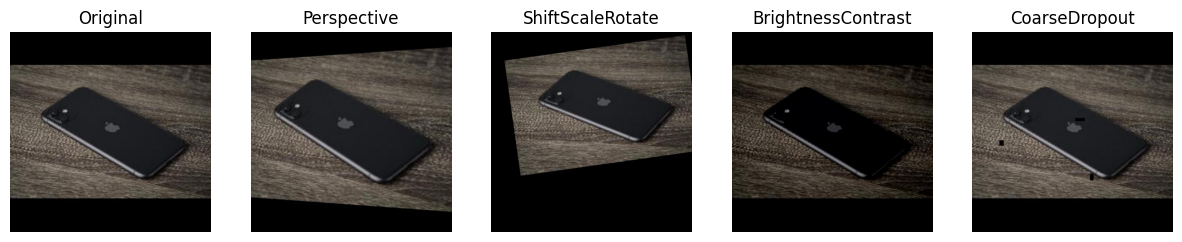

In [2]:
# pptx 추가용
import cv2
import numpy as np
import albumentations as A
import matplotlib.pyplot as plt

# 증강 변환 정의 (4가지 변환)
transform1 = A.Perspective(scale=(0.05, 0.15), keep_size=True, pad_mode=cv2.BORDER_CONSTANT, p=1.0)
transform2 = A.ShiftScaleRotate(shift_limit=0.2, scale_limit=0.2, rotate_limit=15, border_mode=cv2.BORDER_CONSTANT, p=1.0)
transform3 = A.RandomBrightnessContrast(brightness_limit=(-0.2, 0.2), contrast_limit=(-0.2, 0.2), p=1.0)
transform4 = A.CoarseDropout(max_holes=3, max_height=30, max_width=30, min_height=10, min_width=10, fill_value=0, p=1.0)

# 원본 이미지 로드 (경로 수정 필요)
image_path = "/home/alpaco/lyj/phone/images/7MJJGLLR6RBRFD5QN44TFJO7AQ_jpg.rf.bfb2d131883b55bb6a33a03419cc9163.jpg"  # 사용할 이미지 경로 설정
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # OpenCV는 BGR이므로 RGB로 변환

# 변환 적용
augmented1 = transform1(image=image)['image']
augmented2 = transform2(image=image)['image']
augmented3 = transform3(image=image)['image']
augmented4 = transform4(image=image)['image']

# 결과 출력
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

axes[0].imshow(image)
axes[0].set_title("Original")
axes[1].imshow(augmented1)
axes[1].set_title("Perspective")
axes[2].imshow(augmented2)
axes[2].set_title("ShiftScaleRotate")
axes[3].imshow(augmented3)
axes[3].set_title("BrightnessContrast")
axes[4].imshow(augmented4)
axes[4].set_title("CoarseDropout")

for ax in axes:
    ax.axis("off")

plt.show()
